In [1]:
from app.allocation import *
import matplotlib.pyplot as plt

In [42]:
studentPref = "/mnt/c/Users/Ramon/Documents/Codes/FYP/backend/sample_data/prefs.csv"
ProjectInfo =  "/mnt/c/Users/Ramon/Documents/Codes/FYP/backend/sample_data/props-msc.csv"

with open(studentPref, mode="r", encoding="utf-8-sig") as infile:
    inputDict = csv.DictReader(infile)
    studentPreferences = createStudentPrefMap(inputDict)
with open(ProjectInfo, mode="r", encoding="utf-8-sig") as infile:
    inputDict = csv.DictReader(infile)
    ProfProjMap = createProjProfMap(inputDict)
config = Config(defaultLoad = 1, maxDepth = 5)
costMap = getCostMap(studentPreferences)
studentProjectList = {
    student: [proj for proj, _ in projList]
    for student, projList in studentPreferences.items()
}
alloc = allocate(studentProjectList, ProfProjMap, config, costMap)
print(f"unallocated student: {len([k for k, v in alloc.items() if v == 0])}")

defaultdict(<class 'int'>, {6180: 1, 40: 1, 5652: 1, 3220: 1, 8976: 1, 7928: 1, 5460: 1, 9193: 1, 7748: 1, 3219: 1, 7105: 1, 8977: 1, 5448: 1, 8307: 1, 9045: 1, 727: 1, 8805: 1, 1223: 1, 9126: 1, 71: 1, 1960: 1, 7958: 1, 8370: 1, 2019: 1, 2610: 1, 27685: 1, 52366: 1, 42668: 1, 77222: 1, 42929: 1})
unallocated student: 21


(array([21., 63., 10.,  9.,  8.,  8.,  4.,  5.,  1.,  4.]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <BarContainer object of 10 artists>)

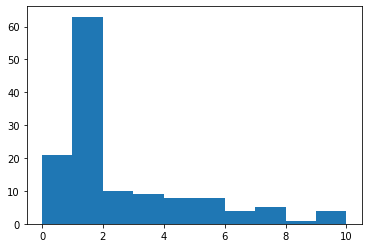

In [43]:
def getStudentRankMap(alloc, studentPreferences):
    studentPrefRankMap = {student: {proj: rank for proj, rank in projList} for student, projList in studentPreferences.items()}
    res = {}
    for student, project in alloc.items():
        if project == 0:
            res[student] = 0
        else:
            res[student] = studentPrefRankMap[student][project]
    return res
rankHist = getStudentRankMap(alloc, studentPreferences)
plt.hist(rankHist.values(), bins=[i for i in range(0, 11)])

In [44]:
def getPerceivedUnfair(alloc, rankHist):
    print(rankHist)

getPerceivedUnfair(alloc, rankHist)

{90354: 1, 90335: 2, 90324: 1, 90420: 3, 90439: 2, 90346: 4, 90359: 1, 90444: 2, 90577: 4, 90387: 3, 90305: 5, 90437: 5, 90381: 4, 89999: 1, 90310: 1, 90341: 1, 90384: 1, 90378: 2, 90424: 1, 90388: 3, 65941: 1, 90576: 6, 90411: 1, 90391: 1, 90307: 5, 90389: 1, 90405: 1, 90312: 2, 90431: 0, 90455: 1, 90403: 2, 90364: 2, 90338: 1, 90398: 3, 89278: 1, 90357: 1, 90414: 5, 90456: 1, 90426: 1, 90327: 1, 90422: 1, 90347: 1, 90317: 1, 90308: 1, 90810: 1, 90805: 1, 90360: 1, 90441: 7, 90397: 1, 90572: 1, 90415: 1, 90374: 1, 90361: 1, 90440: 1, 90408: 3, 90337: 1, 90410: 8, 90394: 1, 90448: 1, 90379: 1, 65768: 1, 90366: 1, 90336: 7, 90390: 2, 90445: 6, 90334: 1, 90302: 5, 90419: 5, 90578: 1, 90301: 1, 90315: 7, 90396: 1, 90318: 2, 90802: 1, 90436: 1, 90386: 5, 90402: 1, 90369: 1, 90377: 4, 90406: 1, 90427: 7, 90323: 2, 90399: 4, 90367: 4, 90385: 5, 90356: 3, 90352: 1, 90421: 3, 90344: 1, 90371: 1, 90454: 1, 90320: 1, 90345: 3, 90806: 0, 90449: 0, 90342: 1, 90401: 1, 90331: 0, 90413: 0, 90382: 1,